In [1]:
# import Pkg; Pkg.add(url="https://github.com/Red-Portal/SteinDiscrepancy.jl.git")
using Random, Distributions, RData

In [2]:
# import the kernel stein discrepancy function and kernel to use
using SteinDiscrepancy: SteinInverseMultiquadricKernel, ksd
# create the kernel instance
kernel = SteinInverseMultiquadricKernel()

┌ Info: Precompiling SteinDiscrepancy [47571ba0-6b7d-4e5f-b5d0-9456c75a042d]
└ @ Base loading.jl:1342
┌ Warning: Package SteinDiscrepancy does not have LinearAlgebra in its dependencies:
│ - If you have SteinDiscrepancy checked out for development and have
│   added LinearAlgebra as a dependency but haven't updated your primary
│   environment's manifest file, try `Pkg.resolve()`.
│ - Otherwise you may need to report an issue with SteinDiscrepancy
└ Loading LinearAlgebra into SteinDiscrepancy from project dependency, future warnings for SteinDiscrepancy are suppressed.


SteinInverseMultiquadricKernel(0.5, 1.0)

In [16]:
# define the grad beta of log density of half-t prior
function grad_log_normal(x::Vector{Float64})
    -x
end

grad_log_normal (generic function with 1 method)

In [32]:
# Generate samples from the prior
nsamples = 2000
dimension = 2
samples = reshape(rand(Normal(),nsamples*dimension),(nsamples,dimension));

In [33]:
grads = zeros(size(samples))
for i in [1:1:nsamples;]
    grads[i,:] = grad_log_normal(samples[i,:])
end
# gradlogp(samples[10,:])

In [34]:
[mean(grads, dims=1), var(grads, dims=1)/(nsamples)]

2-element Vector{Matrix{Float64}}:
 [-0.011447553911479655 0.019914995716850428]
 [0.0004903945628480004 0.0005017850195340065]

In [ ]:
interval = 10
npoints = trunc(Int,nsamples/interval)
kernel_stein_discrepancy = zeros(((npoints-1),1))
# compute the KSD2
for i in [2:1:npoints;]
    result = ksd(points=samples[1:(i*interval),:], gradlogdensity=grad_log_normal, kernel=kernel)
    # get the final ksd
    kernel_stein_discrepancy[(i-1)] = sqrt(result.discrepancy2)
    print(i)
end

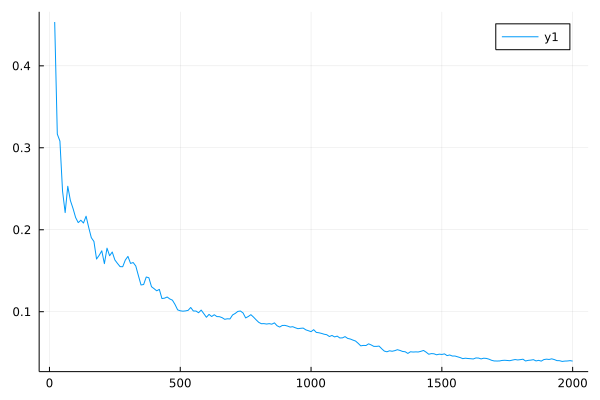

In [103]:
using Statistics, Plots
plot([2:1:npoints;]*interval, kernel_stein_discrepancy)

In [99]:
nsamples = 1000;
dimensions = vcat([1,10],[100:100:1000;])
ndimensions = size(dimensions)[1];

ksd_by_dimension = zeros((ndimensions,2));
# Compute the KSD2
for i in [1:1:ndimensions;]
    dimension = dimensions[i]
    # Generate samples from the prior
    samples = reshape(rand(Normal(),nsamples*dimension),(nsamples,dimension));
    # Calculate ksd
    result = ksd(points=samples, gradlogdensity=grad_log_normal, kernel=kernel);
    ksd_by_dimension[(i),1] = dimension;
    ksd_by_dimension[(i),2] = sqrt(result.discrepancy2);
    print(dimension)
end

1101002003004005006007008009001000

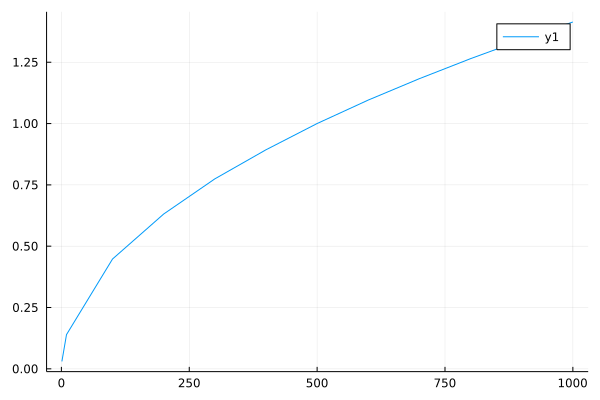

In [100]:
using Statistics, Plots
plot(ksd_by_dimension[:,1], ksd_by_dimension[:,2])

In [102]:
using CSV, Tables
CSV.write("std_normal_ksd_by_dimension.csv", Tables.table(ksd_by_dimension))

"std_normal_ksd_by_dimension.csv"